In [1]:
import numpy as np
from keras.datasets import mnist
(trainingData, trainingOutputs), (validationData, validationOutputs) = mnist.load_data()

del mnist

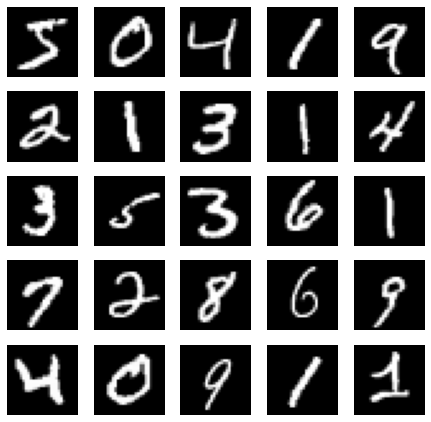

In [2]:
from matplotlib import pyplot as plt
n=5
fig, axes = plt.subplots(nrows=n, ncols=n, figsize=(7.5,7.5))

for i in range(n**2):
    ax = axes[i//n][i%n]
    ax.axis("off")
    ax.imshow(trainingData[i], cmap=plt.get_cmap('gray'))

fig.subplots_adjust(wspace=0.2)
plt.show()
del n, fig, axes, ax

In [3]:
trainingData = trainingData.reshape(trainingData.shape[0], trainingData.shape[1]*trainingData.shape[2])
validationData = validationData.reshape(validationData.shape[0], validationData.shape[1]*validationData.shape[2])

In [4]:
newTrainingOutputs = np.zeros((trainingOutputs.shape[0], 10))
for i in range(len(trainingOutputs)):
    newTrainingOutputs[i, trainingOutputs[i]] = 1

trainingOutputs = newTrainingOutputs
del newTrainingOutputs

newValidationOutputs = np.zeros((validationOutputs.shape[0], 10))
for i in range(len(validationOutputs)):
    newValidationOutputs[i, validationOutputs[i]] = 1

validationOutputs = newValidationOutputs
del newValidationOutputs

C:\Users\Eshaan\AppData\Local\Temp\ipykernel_15608\3424674030.py:7: RuntimeWarning: overflow encountered in power
  return 1/(1+np.e**(-n))


Iteration 1, Cost 3.8036508385530574
Iteration 2, Cost 3.2931501164178343
Iteration 3, Cost 3.2415134531314367
Iteration 4, Cost 3.2223025055648553
Iteration 5, Cost 3.2077811533233893
Iteration 6, Cost 3.193786462689638
Iteration 7, Cost 3.179279285140063
Iteration 8, Cost 3.1640761888695867
Iteration 9, Cost 3.147783384912655
Iteration 10, Cost 3.1301468967198947
Iteration 11, Cost 3.1108108048455136
Iteration 12, Cost 3.0905908740135075
Iteration 13, Cost 3.0690334194192843
Iteration 14, Cost 3.046536099234556
Iteration 15, Cost 3.0235296769775766
Iteration 16, Cost 3.0002427447884026
Iteration 17, Cost 2.9772861541541484
Iteration 18, Cost 2.9546071050658624
Iteration 19, Cost 2.9321741787158255
Iteration 20, Cost 2.9089258550019412
Iteration 21, Cost 2.88589730340682
Iteration 22, Cost 2.863056959152841
Iteration 23, Cost 2.8400404471427465
Iteration 24, Cost 2.8167078973436146
Iteration 25, Cost 2.7935074713698897
Iteration 26, Cost 2.7690008040745435
Iteration 27, Cost 2.7454521

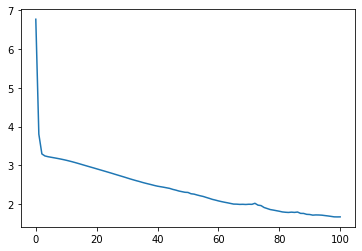

In [18]:
epsilon = np.sqrt(6)/np.sqrt(785+26)
weights = np.array([np.random.uniform(-epsilon, epsilon, 785*25).reshape((785, 25)), np.random.uniform(-epsilon, epsilon, 26*10).reshape(26, 10)], dtype=object)

def sigmoid(n):
    return 1/(1+np.e**(-n))

def predict(weights, data=trainingData):
    layer2_pre = sigmoid(np.hstack([
        np.ones((trainingData.shape[0], 1)),
        trainingData
    ]) @ weights[0])

    return sigmoid(np.hstack([
        np.ones((layer2_pre.shape[0], 1)),
        layer2_pre
    ]) @ weights[1])

def J(weights, data=trainingData, outputs=trainingOutputs):
    return -np.sum(np.mean(
        outputs*np.log(predict(weights, data))
        + (1 - outputs)*np.log(1 - predict(weights, data))
    , 0))

def forwardProp(weights, data=trainingData):
    layer1 = np.hstack([
        np.ones((trainingData.shape[0], 1)),
        trainingData
    ])

    layer2_pre = sigmoid(layer1 @ weights[0])
    layer2 = np.hstack([
        np.ones((layer2_pre.shape[0], 1)),
        layer2_pre
    ])

    layer3 = sigmoid(layer2 @ weights[1])

    return [layer1, layer2, layer3]

def backProp(forwardPropData, weights, outputs=trainingOutputs):
    preds = forwardPropData[2]
    delta2 = -(outputs/preds - (1-outputs)/(1-preds))*preds*(1-preds)
    del preds
    deriv_weights_1 = np.mean(
        delta2[:,np.newaxis,:]*forwardPropData[1][:,:,np.newaxis]
    , 0)
    delta1 = (
        delta2 @ weights[1].T * forwardPropData[1]*(1-forwardPropData[1])
    )[:,1:]
    del delta2
    deriv_weights_0 = np.mean(
        delta1[:,np.newaxis,:]*forwardPropData[0][:,:,np.newaxis]
    , 0)
    del delta1
    return np.array([deriv_weights_0, deriv_weights_1], dtype=object)

iterations = 100
cost_history = [J(weights)]
for i in range(iterations):
    weightGradients = backProp(forwardProp(weights), weights)
    weights = weights - 0.25 * weightGradients
    del weightGradients
    cost_history.append(J(weights))
    print(f"Iteration {i+1}, Cost {cost_history[-1]}")

print("Initial cost:", cost_history[0])
print("Final cost:", cost_history[-1])
plt.plot(np.arange(iterations+1), cost_history)
plt.show()